In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
bitcoin = pd.read_csv('D:\\UA\\GitHub1\\REU\\csv files\\BTC.csv')

In [3]:
bitcoin.shape

(366, 9)

In [4]:
bitcoin.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1687046400,26686.77,26260.74,26510.43,9378.95,2.486249e+08,26338.00,direct,NaN
1,1687132800,27036.32,26265.34,26338.00,17956.62,4.777134e+08,26842.09,direct,NaN
2,1687219200,28407.13,26648.29,26842.09,45985.63,1.265530e+09,28319.35,direct,NaN
3,1687305600,30780.84,28276.59,28319.35,57981.94,1.710075e+09,30000.55,direct,NaN
4,1687392000,30499.85,29611.53,30000.55,34380.15,1.034077e+09,29892.81,direct,NaN


Text(0, 0.5, '$ Price')

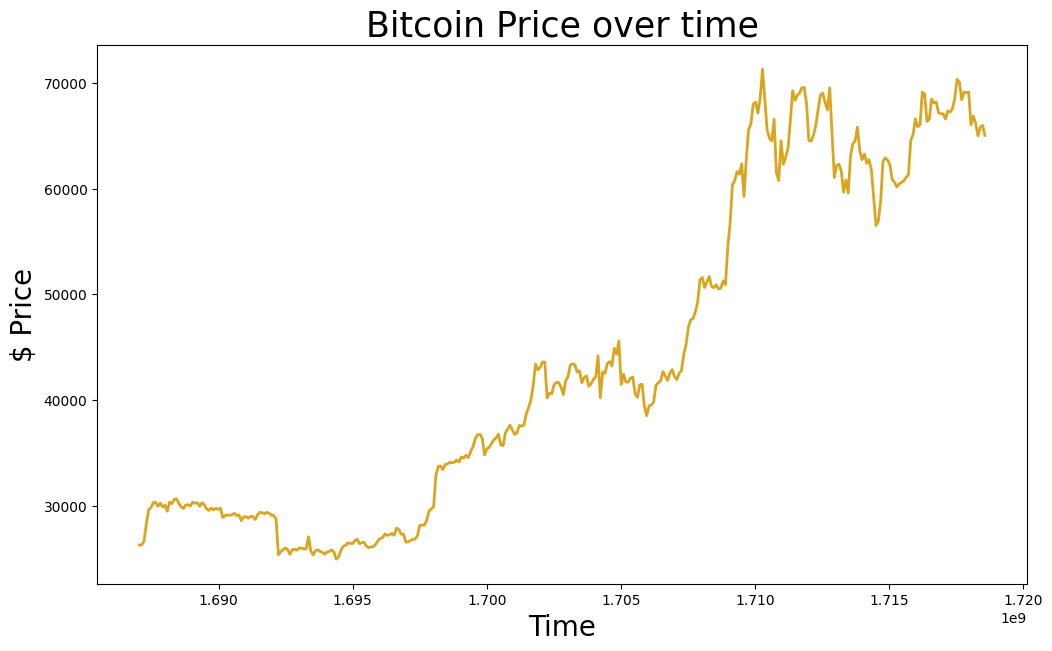

In [5]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["time"], bitcoin["low"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

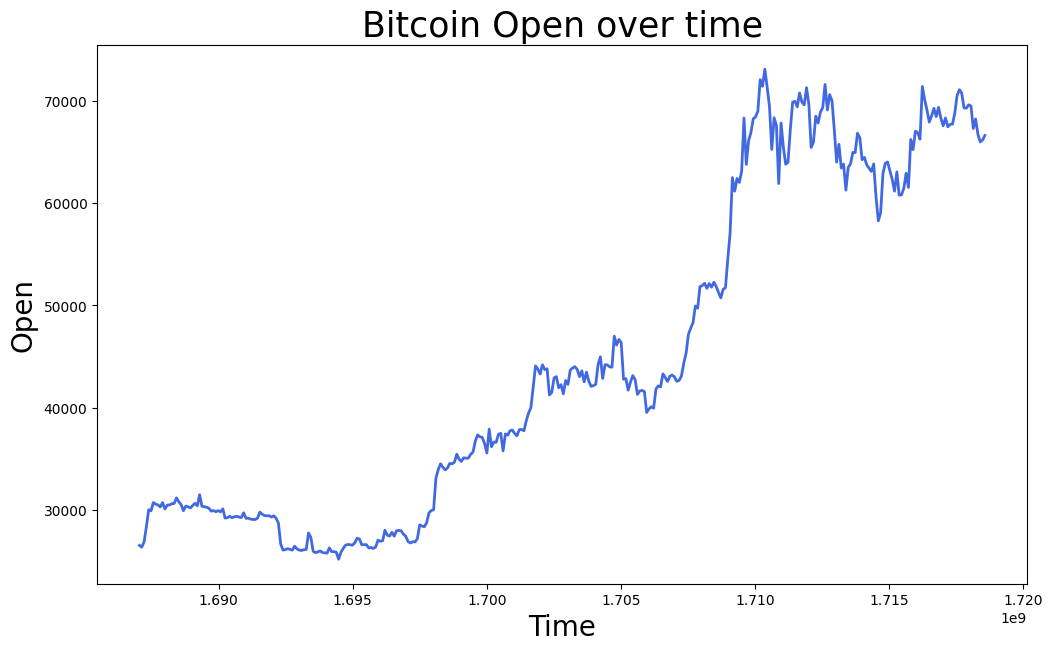

In [6]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["time"], bitcoin["open"], color='royalblue', lw=2)
plt.title("Bitcoin Open over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Open", size=20);

In [7]:
bitcoin.isnull().sum()

time                  0
high                  0
low                   0
open                  0
volumefrom            0
volumeto              0
close                 0
conversionType        0
conversionSymbol    366
dtype: int64

In [8]:
bitcoin['Dates'] = pd.to_datetime(bitcoin['time'], unit='s')
bitcoin.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,Dates
0,1687046400,26686.77,26260.74,26510.43,9378.95,2.486249e+08,26338.00,direct,NaN,2023-06-18
1,1687132800,27036.32,26265.34,26338.00,17956.62,4.777134e+08,26842.09,direct,NaN,2023-06-19
2,1687219200,28407.13,26648.29,26842.09,45985.63,1.265530e+09,28319.35,direct,NaN,2023-06-20
3,1687305600,30780.84,28276.59,28319.35,57981.94,1.710075e+09,30000.55,direct,NaN,2023-06-21
4,1687392000,30499.85,29611.53,30000.55,34380.15,1.034077e+09,29892.81,direct,NaN,2023-06-22


In [11]:
required_features = ['open', 'high', 'low', 'volumefrom', 'volumeto', 'close']
output_label = 'close'

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
bitcoin[required_features],
bitcoin[output_label],
test_size = 0.3
)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
model.score(x_test, y_test)

1.0

In [15]:
future_set = bitcoin.shift(periods=30).tail(30)

In [16]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

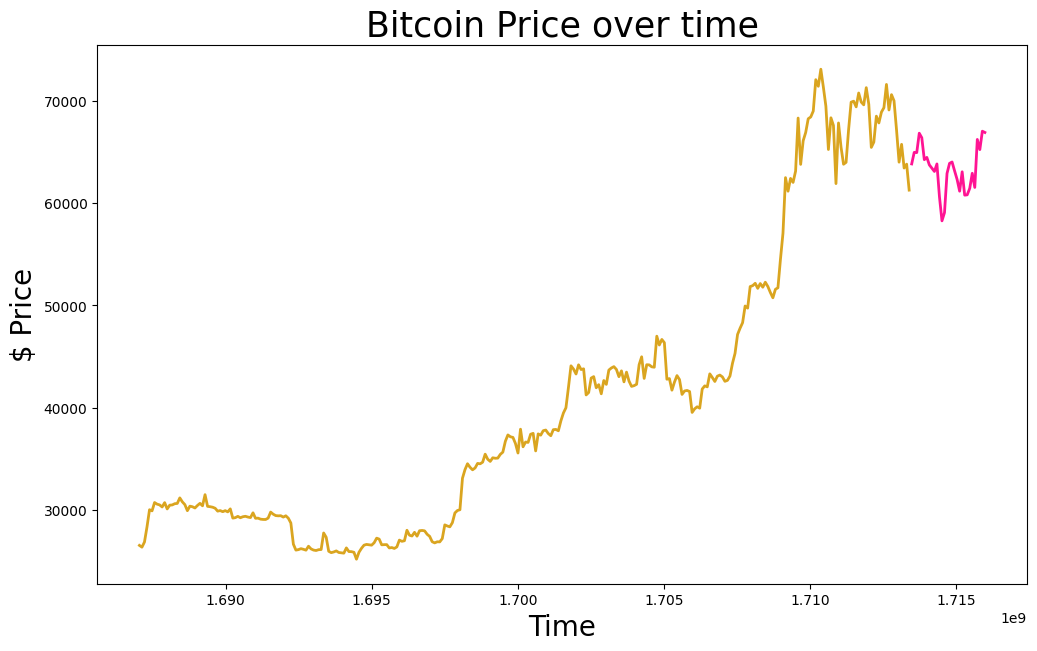

In [19]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["time"][-400:-60], bitcoin["open"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["time"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)